<a href="https://colab.research.google.com/github/GopikaGupta/Machine_Learning_from_Scratch/blob/main/Pune_House_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [92]:
import pandas as pd
import io
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV


In [2]:
from google.colab import files
uploaded=files.upload()

Saving Pune_House_Data.csv to Pune_House_Data.csv


In [3]:
df=pd.read_csv(io.BytesIO(uploaded['Pune_House_Data.csv']))

In [4]:
df.head()

,area_type,availability,size,society,total_sqft,bath,balcony,price,site_location
0,Super built-up Area,19-Dec,2 BHK,Coomee,1056,2.0,1.0,39.07,Alandi Road
1,Plot Area,Ready To Move,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,Ambegaon Budruk
2,Built-up Area,Ready To Move,3 BHK,NaN,1440,2.0,3.0,62.00,Anandnagar
3,Super built-up Area,Ready To Move,3 BHK,Soiewre,1521,3.0,1.0,95.00,Aundh
4,Super built-up Area,Ready To Move,2 BHK,NaN,1200,2.0,1.0,51.00,Aundh Road


In [5]:
df.tail()

,area_type,availability,size,society,total_sqft,bath,balcony,price,site_location
13315,Built-up Area,Ready To Move,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.0,Pashan
13316,Super built-up Area,Ready To Move,4 BHK,NaN,3600,5.0,NaN,400.0,Paud Road
13317,Built-up Area,Ready To Move,2 BHK,Mahla T,1141,2.0,1.0,60.0,Pirangut
13318,Super built-up Area,18-Jun,4 BHK,SollyCl,4689,4.0,1.0,488.0,Prabhat Road
13319,Super built-up Area,Ready To Move,1 BHK,NaN,550,1.0,1.0,17.0,Pune Railway Station


In [6]:
df.shape

(13320, 9)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   area_type      13320 non-null  object 
 1   availability   13320 non-null  object 
 2   size           13304 non-null  object 
 3   society        7818 non-null   object 
 4   total_sqft     13320 non-null  object 
 5   bath           13247 non-null  float64
 6   balcony        12711 non-null  float64
 7   price          13320 non-null  float64
 8   site_location  13319 non-null  object 
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [8]:
df.isnull().sum()

,0
area_type,0
availability,0
size,16
society,5502
total_sqft,0
bath,73
balcony,609
price,0
site_location,1


In [9]:
## Check for unique values in each column
for col in df.columns:
  print(f"Unique value in {col}: {df[col].nunique()}")

Unique value in area_type: 4
Unique value in availability: 81
Unique value in size: 31
Unique value in society: 2688
Unique value in total_sqft: 2117
Unique value in bath: 19
Unique value in balcony: 4
Unique value in price: 1994
Unique value in site_location: 97


In [10]:
## Data Processing
df['area_type'].value_counts()

,count
area_type,
Super built-up Area,8790
Built-up Area,2418
Plot Area,2025
Carpet Area,87


In [11]:
df['availability'].value_counts()

,count
availability,
Ready To Move,10581
18-Dec,307
18-May,295
18-Apr,271
18-Aug,200
...,...
16-Oct,1
17-Jan,1
16-Nov,1


In [12]:
df.groupby('size')['size'].agg('count')

,size
size,
1 BHK,538
1 Bedroom,105
1 RK,13
10 BHK,2
10 Bedroom,12
11 BHK,2
11 Bedroom,2
12 Bedroom,1
13 BHK,1


In [16]:
df['size']=df['size'].replace('1RK','0 BHK')

In [20]:
df[['number_of_bedrooms','BHK']]=df['size'].str.split(' ',expand=True)

df['number_of_bedrooms']=pd.to_numeric(df['number_of_bedrooms'])

In [21]:
df.drop('size',axis='columns',inplace=True)
df.drop('BHK',axis='columns',inplace=True)

In [25]:
def convert_sqft_to_num(x):
  tokens=x.split('-')
  if len(tokens)==2:
    return (float(tokens[0])+float(tokens[1]))/2
  try:
    return float(x)
  except:
    return None

df['total_sqft']=df['total_sqft'].apply(convert_sqft_to_num)

In [28]:
df.head()

,area_type,availability,society,total_sqft,bath,balcony,price,site_location,number_of_bedrooms
0,Super built-up Area,19-Dec,Coomee,1056.0,2.0,1.0,39.07,Alandi Road,2.0
1,Plot Area,Ready To Move,Theanmp,2600.0,5.0,3.0,120.00,Ambegaon Budruk,4.0
2,Built-up Area,Ready To Move,NaN,1440.0,2.0,3.0,62.00,Anandnagar,3.0
3,Super built-up Area,Ready To Move,Soiewre,1521.0,3.0,1.0,95.00,Aundh,3.0
4,Super built-up Area,Ready To Move,NaN,1200.0,2.0,1.0,51.00,Aundh Road,2.0


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   area_type           13320 non-null  object 
 1   availability        13320 non-null  object 
 2   society             7818 non-null   object 
 3   total_sqft          13274 non-null  float64
 4   bath                13247 non-null  float64
 5   balcony             12711 non-null  float64
 6   price               13320 non-null  float64
 7   site_location       13319 non-null  object 
 8   number_of_bedrooms  13304 non-null  float64
dtypes: float64(5), object(4)
memory usage: 936.7+ KB


In [30]:
df.nunique()

,0
area_type,4
availability,81
society,2688
total_sqft,1999
bath,19
balcony,4
price,1994
site_location,97
number_of_bedrooms,19


In [32]:
df.isna().sum()/df.shape[0]

,0
area_type,0.000000
availability,0.000000
society,0.413063
total_sqft,0.003453
bath,0.005480
balcony,0.045721
price,0.000000
site_location,0.000075
number_of_bedrooms,0.001201


In [34]:
df.drop('society',axis='columns',inplace=True)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   area_type           13320 non-null  object 
 1   availability        13320 non-null  object 
 2   total_sqft          13274 non-null  float64
 3   bath                13247 non-null  float64
 4   balcony             12711 non-null  float64
 5   price               13320 non-null  float64
 6   site_location       13319 non-null  object 
 7   number_of_bedrooms  13304 non-null  float64
dtypes: float64(5), object(3)
memory usage: 832.6+ KB


In [37]:
### Categorical Data
## One Hot Encoding, Ordinal Encoding (Sequence), Target Mean Encoding,Target Guided Ordinal Encoding, Label Encoding

### Target Guided Ordinal Encoding for Area_Type (as we dont know its sequence)
df['area_type'] = df['area_type'].astype(str)
area_type_order=df.groupby('area_type')['price'].mean().sort_values().index
area_type_mapping={k:i for i,k in enumerate(area_type_order,0)}
df['area_type']=df['area_type'].map(area_type_mapping)

In [38]:
area_type_mapping

{'Carpet  Area': 0,
 'Super built-up  Area': 1,
 'Built-up  Area': 2,
 'Plot  Area': 3}

In [39]:
df['availability']=df['availability'].apply(lambda x: 1 if x=='Ready to Move' else 0)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   area_type           13320 non-null  int64  
 1   availability        13320 non-null  int64  
 2   total_sqft          13274 non-null  float64
 3   bath                13247 non-null  float64
 4   balcony             12711 non-null  float64
 5   price               13320 non-null  float64
 6   site_location       13319 non-null  object 
 7   number_of_bedrooms  13304 non-null  float64
dtypes: float64(5), int64(2), object(1)
memory usage: 832.6+ KB


In [41]:
### Exploratory Data Analysis
df.columns

Index(['area_type', 'availability', 'total_sqft', 'bath', 'balcony', 'price',
       'site_location', 'number_of_bedrooms'],
      dtype='object')

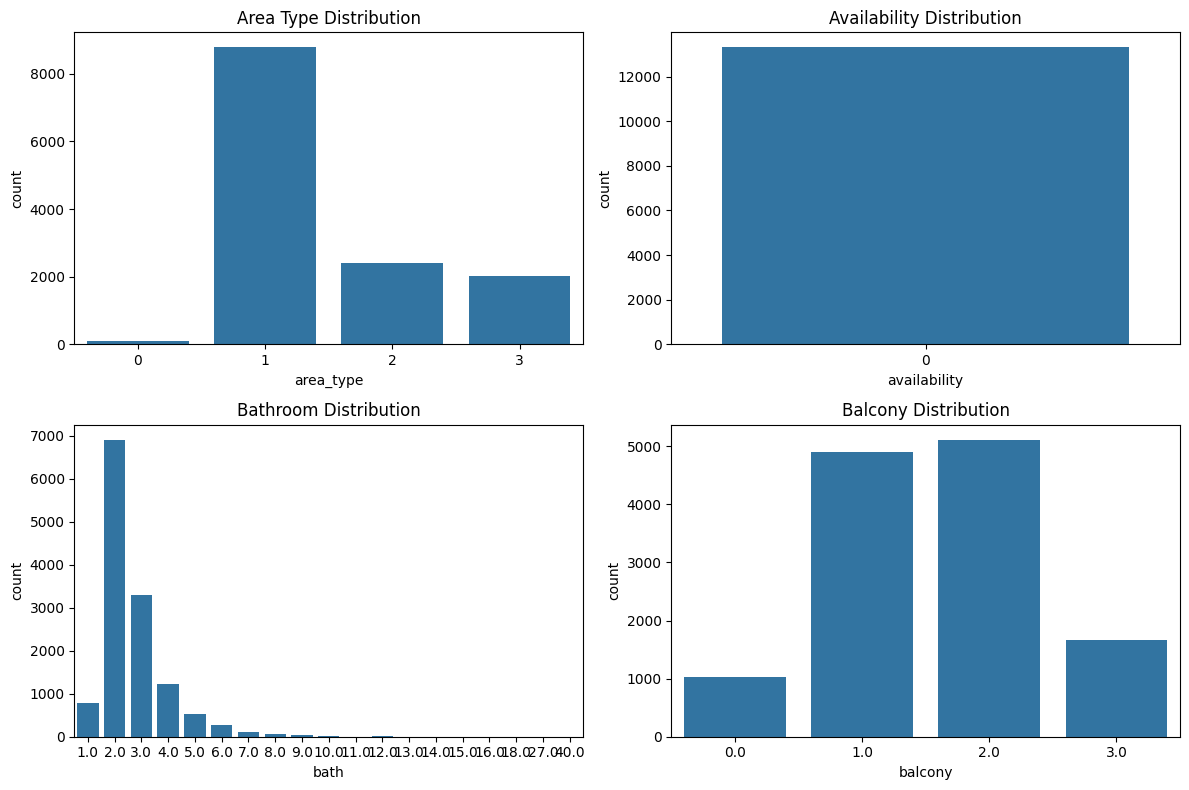

In [46]:
plt.figure(figsize=[12,8])

plt.subplot(2,2,1)
sns.countplot(x='area_type',data=df)
plt.title('Area Type Distribution')


plt.subplot(2,2,2)
sns.countplot(x='availability',data=df)
plt.title('Availability Distribution')


plt.subplot(2,2,3)
sns.countplot(x='bath',data=df)
plt.title('Bathroom Distribution')


plt.subplot(2,2,4)
sns.countplot(x='balcony',data=df)
plt.title('Balcony Distribution')

plt.tight_layout()

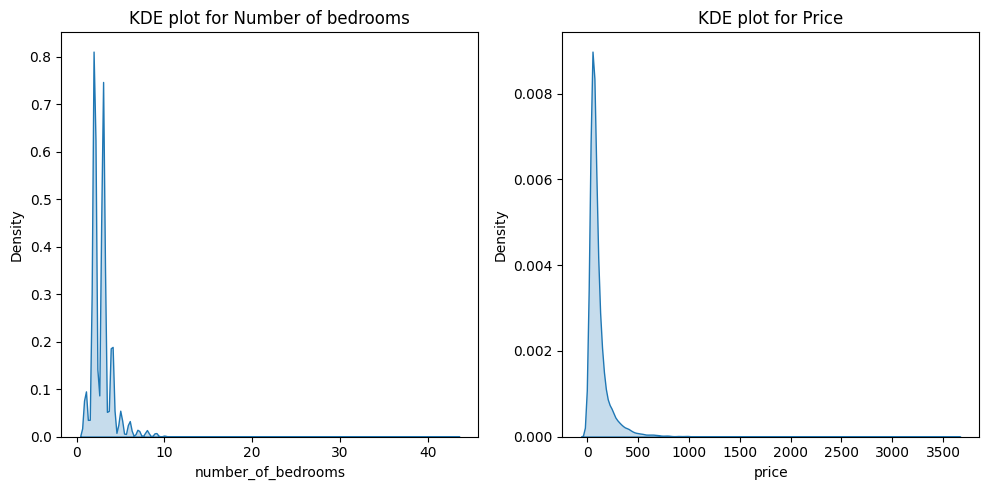

In [48]:
plt.figure(figsize=[15,5])

plt.subplot(1,3,1)
sns.kdeplot(df['number_of_bedrooms'],fill=True)
plt.title('KDE plot for Number of bedrooms')


plt.subplot(1,3,2)
sns.kdeplot(df['price'],fill=True)
plt.title('KDE plot for Price')


#plt.subplot(1,3,3)
#sns.kdeplot(df['availability_days'],fill=True)
#plt.title('KDE plot for Availability of days')


plt.tight_layout()

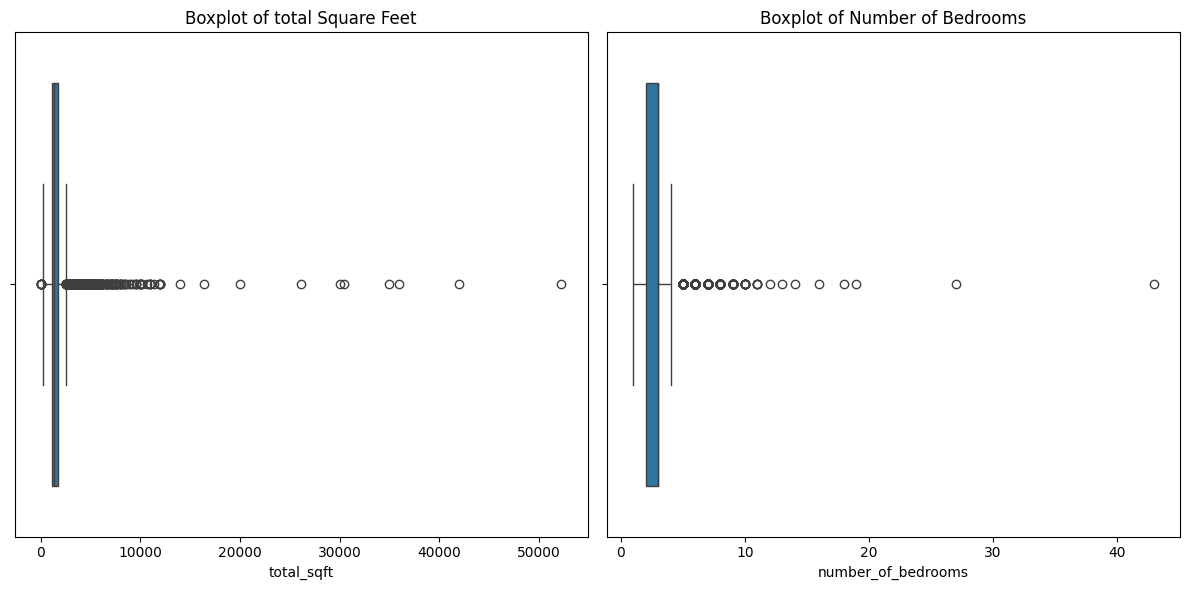

In [51]:
plt.figure(figsize=[12,6])

plt.subplot(1,2,1)
sns.boxplot(x=df['total_sqft'])
plt.title('Boxplot of total Square Feet')


plt.subplot(1,2,2)
sns.boxplot(x=df['number_of_bedrooms'])
plt.title('Boxplot of Number of Bedrooms')


plt.tight_layout()

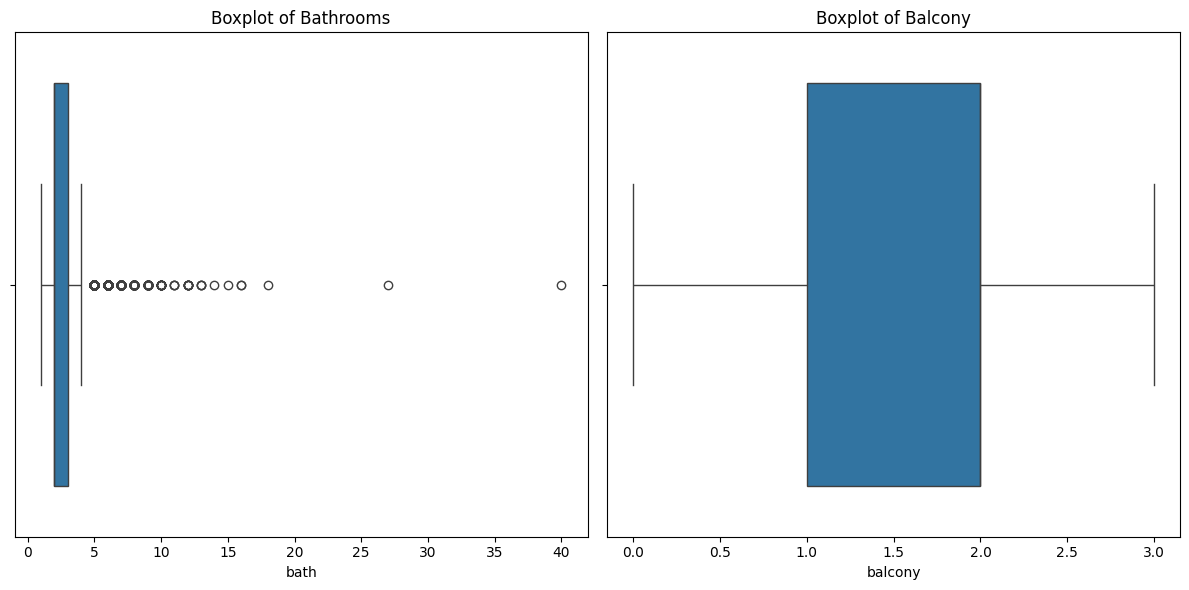

In [52]:
plt.figure(figsize=[12,6])

plt.subplot(1,2,1)
sns.boxplot(x=df['bath'])
plt.title('Boxplot of Bathrooms')


plt.subplot(1,2,2)
sns.boxplot(x=df['balcony'])
plt.title('Boxplot of Balcony')

plt.tight_layout()

In [100]:
def remove_outliers_iqr(df,column):
  Q1=df[column].quantile(0.25)
  Q3=df[column].quantile(0.75)
  IQR=Q3-Q1
  lower_bound=Q1-1.5*IQR
  upper_bound=Q3+1.5*IQR
  df_filtered=df[(df[column]>=lower_bound)&(df[column]<=upper_bound)]
  return df_filtered

df=remove_outliers_iqr(df,'total_sqft')
df=remove_outliers_iqr(df,'number_of_bedrooms')
df=remove_outliers_iqr(df,'bath')
df=remove_outliers_iqr(df,'balcony')
df=remove_outliers_iqr(df,'price')

In [101]:
def clip_outliers(df,column,lower_percentile=0,upper_percentile=95):
  lower_bound=df[column].quantile(lower_percentile/100)
  upper_bound=df[column].quantile(upper_percentile/100)
  df[column]=df[column].clip(lower=lower_bound,upper=upper_bound)
  return df

df=clip_outliers(df,'total_sqft')
df=clip_outliers(df,'number_of_bedrooms')
df=clip_outliers(df,'bath')

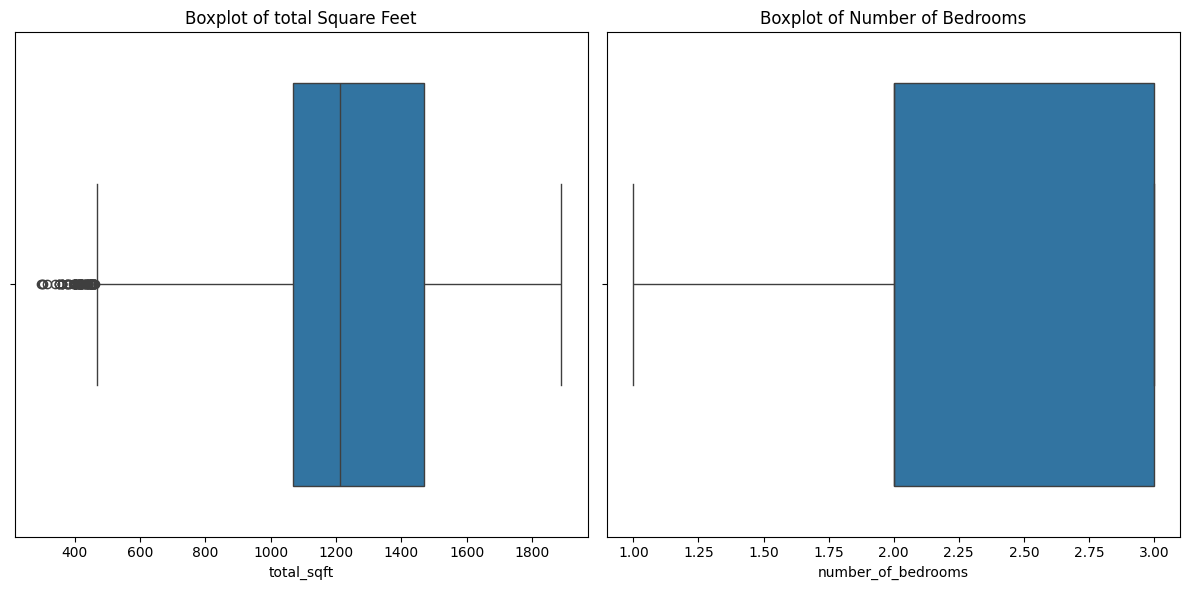

In [102]:
plt.figure(figsize=[12,6])

plt.subplot(1,2,1)
sns.boxplot(x=df['total_sqft'])
plt.title('Boxplot of total Square Feet')


plt.subplot(1,2,2)
sns.boxplot(x=df['number_of_bedrooms'])
plt.title('Boxplot of Number of Bedrooms')


plt.tight_layout()

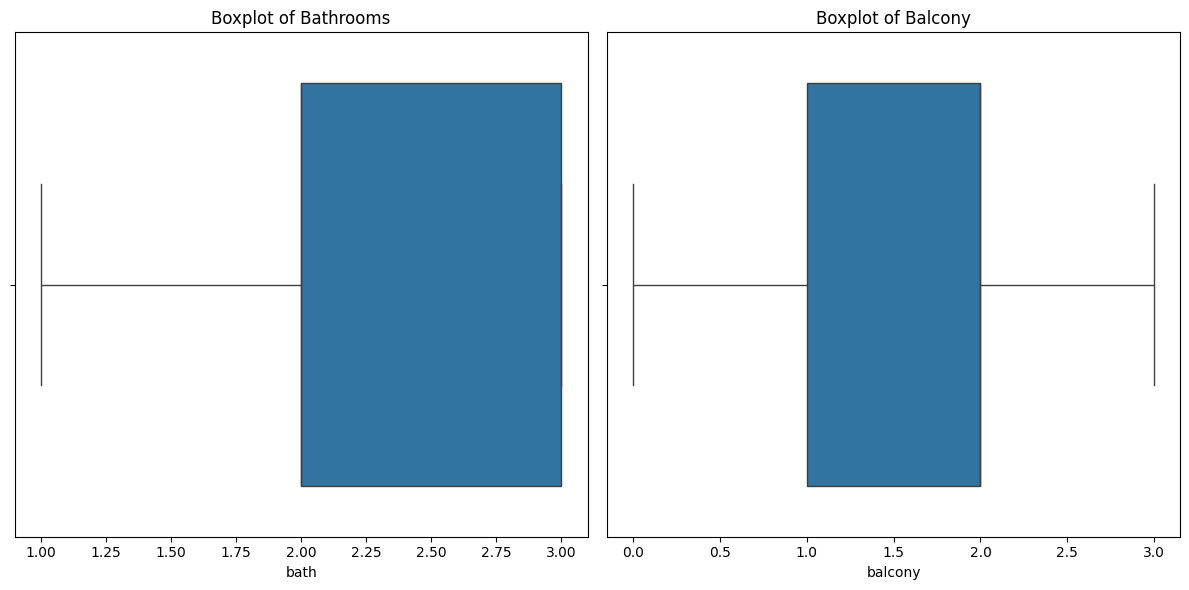

In [103]:
plt.figure(figsize=[12,6])

plt.subplot(1,2,1)
sns.boxplot(x=df['bath'])
plt.title('Boxplot of Bathrooms')


plt.subplot(1,2,2)
sns.boxplot(x=df['balcony'])
plt.title('Boxplot of Balcony')

plt.tight_layout()

Text(0.5, 1.0, 'Correlation Matrix of Numerical Features')

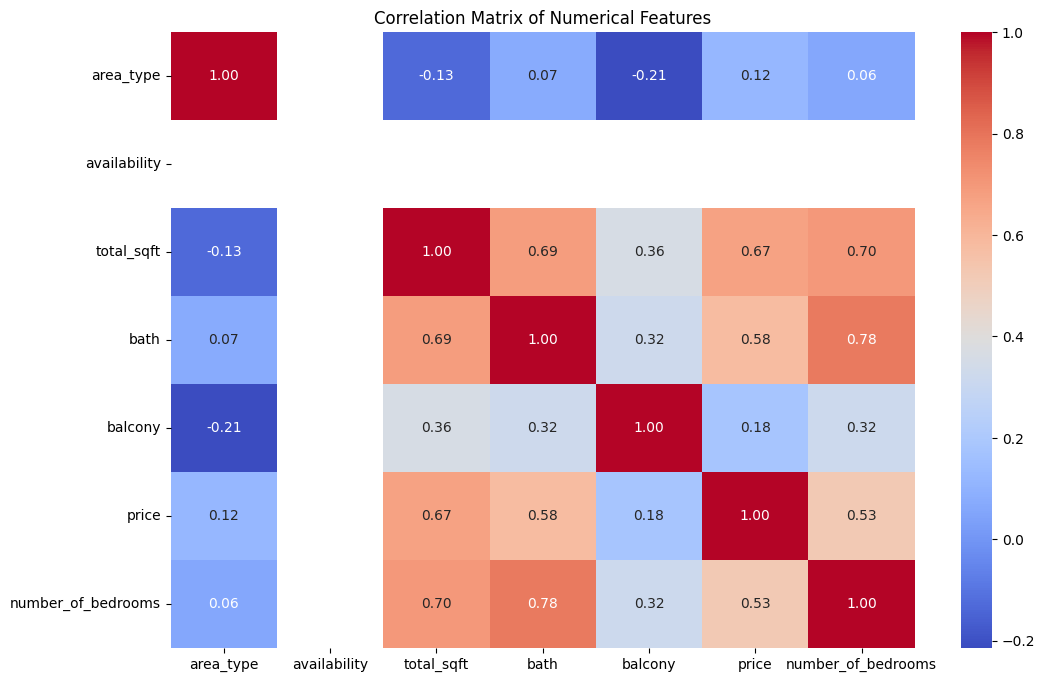

In [104]:
### bivariate Analysis

correlation_matrix=df.select_dtypes(include=np.number).corr()

plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')

<Figure size 1000x800 with 0 Axes>

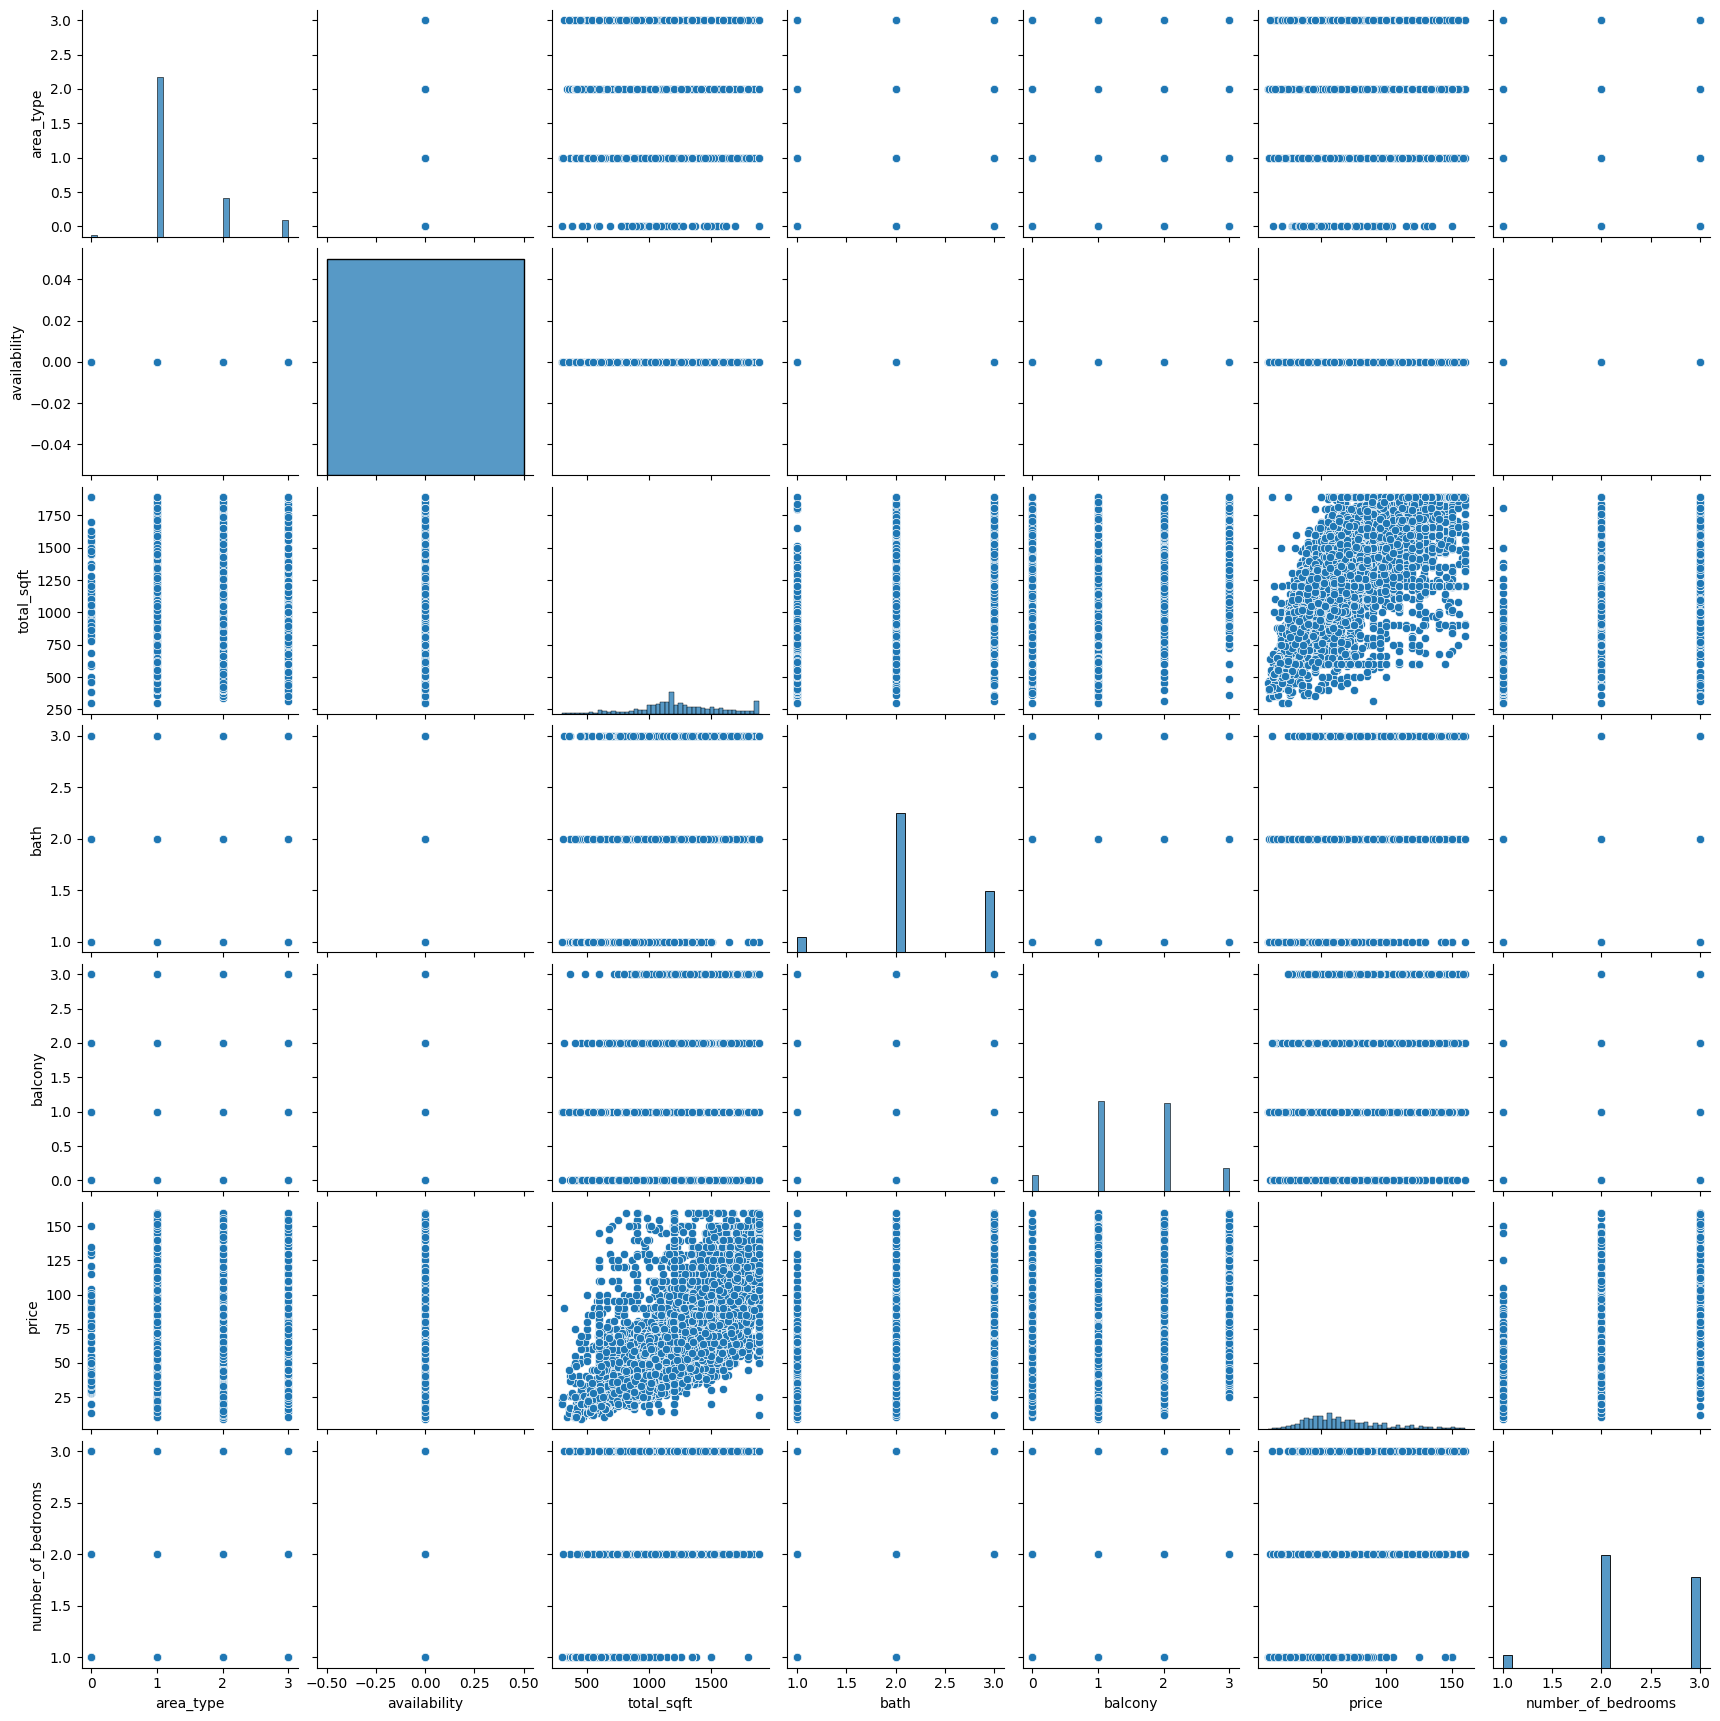

In [105]:
plt.figure(figsize=(10,8))
sns.pairplot(df.select_dtypes(include=np.number))


In [106]:
##Handling missing data
df.isnull().sum()/df.shape[0]

,0
area_type,0.0
availability,0.0
total_sqft,0.0
bath,0.0
balcony,0.0
price,0.0
site_location,0.0
number_of_bedrooms,0.0


In [107]:
df.dropna(inplace=True)

In [108]:
df.isnull().sum()

,0
area_type,0
availability,0
total_sqft,0
bath,0
balcony,0
price,0
site_location,0
number_of_bedrooms,0


In [109]:
### Split the data into feature and traget values
X=df.drop('price',axis=1)
y=df['price']

In [110]:
## Calculating VIF score (Checking Multicollinearity)
numerical_features=X.select_dtypes(include=np.number)

vif_data=pd.DataFrame()
vif_data["feature"]=numerical_features.columns
vif_data["VIF"]=[variance_inflation_factor(numerical_features.values,i) for i in range(len(numerical_features.columns))]
vif_data

/usr/local/lib/python3.12/dist-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


,feature,VIF
0,area_type,4.917869
1,availability,NaN
2,total_sqft,33.586357
3,bath,48.270919
4,balcony,5.877223
5,number_of_bedrooms,50.200738


In [111]:
X.drop('number_of_bedrooms',axis='columns',inplace=True)

In [112]:
numerical_features=X.select_dtypes(include=np.number)

vif_data=pd.DataFrame()
vif_data["feature"]=numerical_features.columns
vif_data["VIF"]=[variance_inflation_factor(numerical_features.values,i) for i in range(len(numerical_features.columns))]
vif_data

/usr/local/lib/python3.12/dist-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


,feature,VIF
0,area_type,4.718116
1,availability,NaN
2,total_sqft,27.533373
3,bath,32.438388
4,balcony,5.824563


In [113]:
X.drop('bath',axis='columns',inplace=True)

In [114]:
numerical_features=X.select_dtypes(include=np.number)

vif_data=pd.DataFrame()
vif_data["feature"]=numerical_features.columns
vif_data["VIF"]=[variance_inflation_factor(numerical_features.values,i) for i in range(len(numerical_features.columns))]
vif_data

/usr/local/lib/python3.12/dist-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


,feature,VIF
0,area_type,3.870371
1,availability,NaN
2,total_sqft,8.815571
3,balcony,5.560551


In [115]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [116]:
## Target encoding
site_location_target_encoding=y_train.groupby(X_train['site_location']).mean()

X_train['site_location_encoded']=X_train['site_location'].map(site_location_target_encoding)
X_test['site_location_encoded']=X_test['site_location'].map(site_location_target_encoding)

X_train.drop('site_location',axis=1,inplace=True)
X_test.drop('site_location',axis=1,inplace=True)

In [117]:
X_train.head()

,area_type,availability,total_sqft,balcony,site_location_encoded
2948,1,0,1128.0,1.0,67.731573
7196,1,0,1385.0,2.0,62.526170
12414,3,0,1200.0,2.0,70.341429
8416,1,0,935.0,2.0,71.385793
10572,1,0,1258.0,1.0,71.497500


In [118]:
### Scaling

scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [119]:
## Model Training

model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [120]:
y_pred=model.predict(X_test)

mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred)


print(f'Mean Absolute Error: {mae}')
print(f'Mean Square Error: {mse}')
print(f'Root Mean Square Error: {rmse}')
print(f'R-Squared: {r2}') ## our model gives only 37% accuracy

Mean Absolute Error: 16.670929443191692
Mean Square Error: 474.88070044232467
Root Mean Square Error: 21.79175762627523
R-Squared: 0.4985108646819465


In [121]:
## Parameter_tuning-regulazrization
param_grid={'alpha':[0.1,1,10],'l1_ratio':[0.1,0.5,0.9]}

elastic_net=ElasticNet()

grid_search=GridSearchCV(elastic_net,param_grid,cv=5,scoring='neg_mean_squared_error')

grid_search.fit(X_train,y_train)

print("Best Hyperparameter:" , grid_search.best_params_)

best_elastic_net=grid_search.best_estimator_

y_pred=best_elastic_net.predict(X_test)

mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred)


print(f'Mean Absolute Error: {mae}')
print(f'Mean Square Error: {mse}')
print(f'Root Mean Square Error: {rmse}')
print(f'R-Squared: {r2}')

Best Hyperparameter: {'alpha': 0.1, 'l1_ratio': 0.9}
Mean Absolute Error: 16.675878760450573
Mean Square Error: 474.722327217723
Root Mean Square Error: 21.78812353594781
R-Squared: 0.49867811184821165


Text(0.5, 1.0, 'Distribution of Residuals')

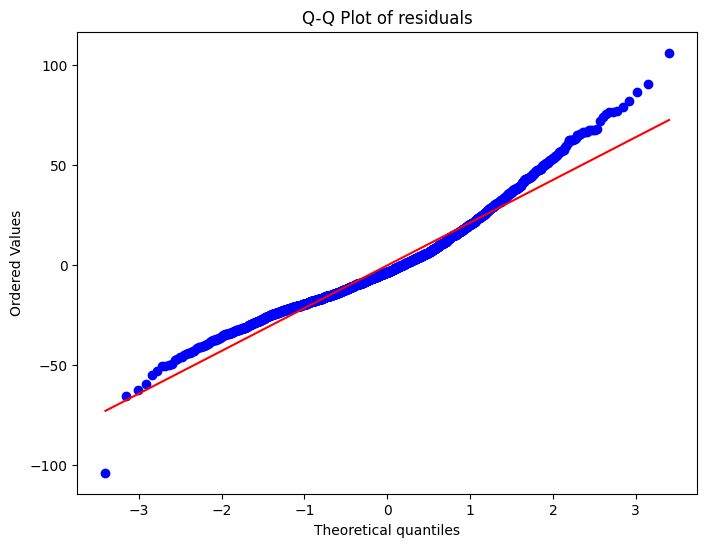

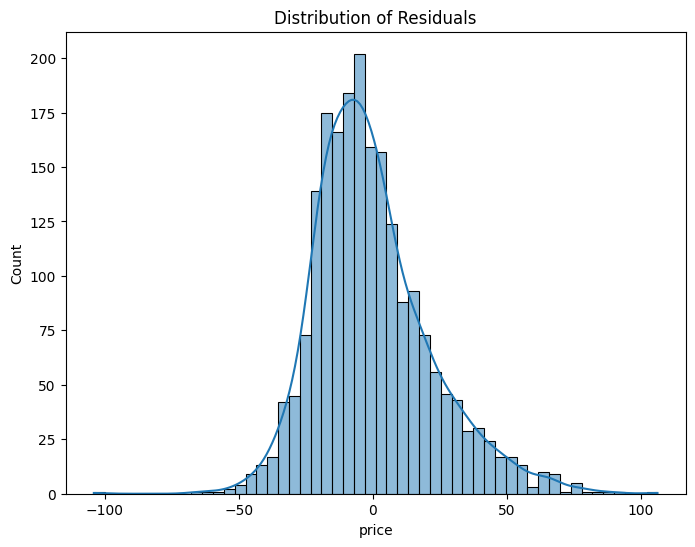

In [122]:
residual=y_test-y_pred

plt.figure(figsize=(8,6))
stats.probplot(residual,dist='norm',plot=plt)
plt.title("Q-Q Plot of residuals")


plt.figure(figsize=(8,6))
sns.histplot(residual,kde=True)
plt.title("Distribution of Residuals")

Text(0.5, 1.0, 'Residual Plot')

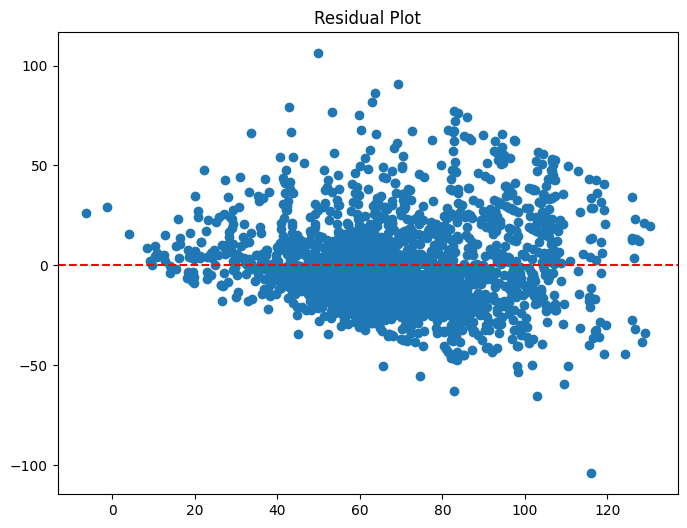

In [123]:
### Check for heteroscedasicity using a residual plot
plt.figure(figsize=(8,6))
plt.scatter(y_pred,residual)
plt.axhline(y=0,color='r',linestyle='--')
plt.title('Residual Plot')

In [124]:
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_predict


models={"Linear Regression": LinearRegression(),
        "Random Forest": RandomForestRegressor(),
        "Gradient Boosting": GradientBoostingRegressor(),
        "Decision Tree": DecisionTreeRegressor(),
        "SVM": SVR()}

result=[]

for name,model in models.items():
  predict=cross_val_predict(model,X_train,y_train,cv=3)


  mae=mean_absolute_error(y_train,predict)
  mse=mean_squared_error(y_train,predict)
  rmse=np.sqrt(mse)
  r2=r2_score(y_train,predict)

  result.append({"Model name": name,
                 "MAE": mae,
                 "MSE": mse,
                 "RMSE": rmse,
                 "R_2 score": r2})

result_df=pd.DataFrame(result)
result_df



,Model name,MAE,MSE,RMSE,R_2 score
0,Linear Regression,16.853569,489.376111,22.121847,0.494247
1,Random Forest,16.163929,482.643760,21.969155,0.501205
2,Gradient Boosting,15.265961,416.344136,20.404513,0.569723
3,Decision Tree,20.561196,810.457892,28.468542,0.162420
4,SVM,15.626520,447.602027,21.156607,0.537419
